In [1]:
%pylab inline
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde
import seaborn as sns
import corner as corner

import scipy.optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'

In [3]:
run_name = 'FUTUREX_NO_ADM_VARYING_BARYONIC'
data = np.loadtxt(run_name+ 'post_equal_weights.dat').T
data_prior_old = np.loadtxt('FERMIONIC_REAL_DATA_PRIOR_scattered.txt')
print(len(data[0]))
print(len(data_prior_old))
print(data_prior_old[500][0])

14917
14985
594.236519913352


In [4]:
data_prior = []
for i in range(len(data_prior_old)):
    if data_prior_old[i][-1] ==0 and data_prior_old[i][5]>=1.:
        data_prior.append([data_prior_old[i][0],data_prior_old[i][1],data_prior_old[i][2]])
        
data_prior = numpy.array(data_prior).T

In [5]:
mchi_prior = data_prior[0]
gchi_over_mphi_prior = data_prior[1]
Fchi_prior = data_prior[2]
if len(data)==10 or len(data)==6:
    mchi = data[0]
    gchi_over_mphi =data[1]
    Fchi = data[2]
    
if len(data)==16 or len(data) == 12:
    mchi = data[5]
    gchi_over_mphi = data[6]
    Fchi = data[7]
    

In [6]:
print(mchi)
print(gchi_over_mphi)

[2.81212858e+07 2.67170673e+06 3.24057457e+04 ... 1.81291910e+02
 1.63748573e+03 1.59276603e+03]
[8.01485708e+00 3.18195920e+01 3.34413609e-01 ... 4.80417089e-05
 1.41451520e-02 1.58224022e-02]


Generating the posterior corner plot


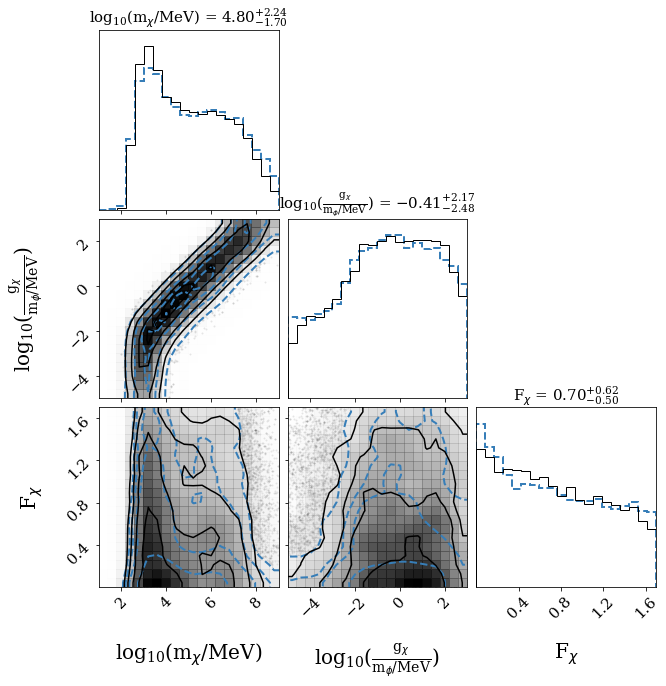

In [7]:
print('Generating the posterior corner plot')
C = data.T
#mchi = C[:,0]
#gchi_over_mphi = C[:,1]
#Fchi = C[:,2]


Matrix = numpy.zeros((len(mchi),3))
###### Everything below this needs to be fixed!####
for i in range(len(mchi)):
    Matrix[i] = numpy.log10(mchi[i]),numpy.log10(gchi_over_mphi[i]),Fchi[i]


#scattered_prior = numpy.loadtxt('PRIOR_FERMIONIC_REAL_07nsaturation_scattered.txt')


Matrix_prior = numpy.zeros((len(data_prior.T),3)) 

for i in range(len(data_prior.T)):
    Matrix_prior[i] = numpy.log10(mchi_prior[i]), numpy.log10(gchi_over_mphi_prior[i]), Fchi_prior[i]       
    
ell = corner.corner(Matrix_prior,smooth = 1.0,color = '#377eb8',group = 'prior',range = [(1,9),(-5,3),(0,1.7)],
                   plot_datapoints = False,plot_density = False,plot_contours = True,divergences = False,
                    hist_kwargs = {'linestyle': '--','linewidth': 2.0}, contour_kwargs = {'linestyles':'dashed','linewidths': 2.0})

figure = corner.corner(Matrix,smooth = 1.0,fig = ell,labels = [r"log$_{10}$(m$_\chi$/MeV)",r"log$_{10}$($\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/\mathdefault{MeV}})$",r"F$_\chi$"]
                       ,color = 'black',range = [(1,9),(-5,3),(0,1.7)],
                       show_titles = True,label_kwargs = {"fontsize":20},title_kwargs = {"fontsize":15},
                       hist_kwargs = {'linewidth':1.0})

#quantiles =(0.001,0.999)
figure.subplots_adjust(right=1.15,top=1.15)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15) 
    
#figure.legend(handles =[matplotlib.lines.Line2D([],[],color = 'black',label = 'Posterior'),
#                        matplotlib.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = '--',lw = 2.0),
#                       matplotlib.lines.Line2D([],[],color = 'C1',label = 'Ground Truth',linestyle = '-',lw = 2.0)],
#                  fontsize = 22,frameon = False,loc = "upper right")
#ground_truth = np.array([np.log10(15000),np.log10(0.01),1.5])
#corner.overplot_lines(figure, ground_truth, color="C1",lw = 2.0)
    
#figure.savefig(run_name + 'Corner.png',dpi = 300,bbox_inches='tight')
figure.savefig(run_name + 'Corner_min_mass_constraint.png',bbox_inches='tight')
#figure.savefig(run_name + 'Corner.pdf',dpi = 300,bbox_inches='tight')

In [8]:
matrix = np.zeros((len(mchi),2))
for i in range(len(matrix)):
    matrix[i] = numpy.log10(gchi_over_mphi[i]/mchi[i]),Fchi[i]
    
matrixp = np.zeros((len(mchi_prior),2))
for i in range(len(matrixp)):
    matrixp[i] = numpy.log10(gchi_over_mphi_prior[i]/mchi_prior[i]),Fchi_prior[i]

# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(matrix[:,0],matrix[:,1],bins=40)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]


print(levels)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
my_fontsize=24
my_font = 'serif'
matplotlib.rc('font',family = my_font)
#plot = sns.kdeplot(data = matrix,x = numpy.log10(gchi_over_mphi/mchi),y = Fchi,fill = True,cbar = True,cmap = 'gray',
#            cbar_kws = {'label': 'PDF'},common_norm = True,levels =[0.05,0.32,1])

plot = sns.kdeplot(data = matrix,x = numpy.log10(gchi_over_mphi/mchi),y = Fchi,fill = True,cbar = False,cmap = 'gray',
            common_norm = True,levels =[0.05,0.32,1])

plot_prior = sns.kdeplot(data = matrixp,x = numpy.log10(gchi_over_mphi_prior/mchi_prior),y = Fchi_prior,fill = False,cbar = False,
                   colors = ['#377eb8','#377eb8'],common_norm = True,levels =[0.05,0.32,1],label = "Prior",linestyles = 'dashed',
                        linewidths = 2.0)
plot.figure.axes[-1].yaxis.label.set_size(24)
plot.figure.axes[-1].xaxis.label.set_size(24)
plot.figure.axes[-1].tick_params(labelsize=24)
ax.set_ylabel(r"F$_\chi$[%]",font = 'serif',size = 24)
ax.set_xlabel(r"$\log_{10}(\frac{g_\chi}{m_\phi/\mathrm{MeV}}/(m_\chi/\mathrm{MeV}))$",font = 'serif',size = 24)

ax.axvline(numpy.log10(0.01/15000),color = 'C1')
ax.axhline(1.5,color = 'C1')
#ax.set_title(r'Future-X: ADM Core Model',fontsize = 20)
ax.legend(handles =[mpatches.Patch(color = 'Grey',label = 'Posterior')],
                 fontsize = 22,frameon = False,loc = "upper right")

#matplotlib.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = 'dashed',linewidth = 2.0),
#matplotlib.lines.Line2D([],[],color = 'C1',label = 'Ground Truth',linestyle = '-',lw = 2.0)


#\mathsf{} puts anything in sans-serif font in python math mode!!
ax.set_yticks([0,0.5,1.,1.5,2.])
ax.set_xticks([-9,-8,-7,-6,-5,-4,-3])
ax.set_ylim(0.0,2.)
ax.set_xlim(-9,-3)
ax.minorticks_on()
ax.tick_params(top=1,right=1, which='both',axis = 'both', direction='in', labelsize=24)
fig.savefig(run_name+'ratio_plot.png',bbox_inches='tight')

In [9]:
def get_quantiles(array, quantiles=[0.05, 0.5, 0.95]): #0.05,0.5,0.95 0.16,0.5,0.84
        contours = np.nanquantile(array, quantiles) #changed to nanquantile to inorder to ignore the nans that may appear
        low = contours[0]
        median = contours[1]
        high = contours[2]
        minus = low - median
        plus = high - median
        return np.round(median,2),np.round(plus,2),np.round(minus,2) 

In [10]:
def get_quantiles2(array, quantiles=[0.05, 0.5, 0.95]): #0.05,0.5,0.95 0.16,0.5,0.84
        contours = np.nanquantile(array, quantiles) #changed to nanquantile to inorder to ignore the nans that may appear
        low = contours[0]
        median = contours[1]
        high = contours[2]
        minus = low - median
        plus = high - median
        return np.round(low,2),np.round(median,2),np.round(high,2) 

In [11]:
print('Priors 68% ', get_quantiles(matrixp[:,0], quantiles = [0.16,0.5,0.84]) )
print('Priors 95% ', get_quantiles(matrixp[:,0]) )

Priors 68%  (-5.7, 1.08, -1.16)
Priors 95%  (-5.7, 1.49, -1.91)


In [12]:
print('Posteriors 68% ', get_quantiles(matrix[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles(matrix[:,0]) )

Posteriors 68%  (-5.49, 0.92, -1.0)
Posteriors 95%  (-5.49, 1.26, -1.82)


In [13]:
print('Priors 68% ', get_quantiles2(matrixp[:,0], quantiles = [0.16,0.5,0.84]) )
print('Priors 95% ', get_quantiles2(matrixp[:,0]) )

Priors 68%  (-6.86, -5.7, -4.62)
Priors 95%  (-7.61, -5.7, -4.21)


In [14]:
print('Posteriors 68% ', get_quantiles2(matrix[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles2(matrix[:,0]) )

Posteriors 68%  (-6.49, -5.49, -4.57)
Posteriors 95%  (-7.31, -5.49, -4.23)


fig, ax = plt.subplots()
sns.histplot(data = matrix,x = numpy.log10(gchi_over_mphi/mchi),y = Fchi, stat="probability",bins =10,common_norm = True,
             kde = True,cbar = True,cmap = 'Reds',cbar_kws = {'label': 'Probability'},thresh = 0)
ax.set_ylabel(r"$F_\chi$",fontsize = 16)
ax.set_xlabel(r"$log_{10}(g_\chi/m_\phi)/log_{10}(m_\chi)$",fontsize = 16)

fig, ax = plt.subplots()
sns.histplot(numpy.log10(gchi_over_mphi/mchi), stat="probability",bins =10,common_norm = True,
             kde = True,thresh = 0)
sns.histplot(numpy.log10(gchi_over_mphi_prior/mchi_prior), stat="probability",bins =10,common_norm = True,
             kde = True,thresh = 0,color = 'gray')
#ax.set_ylabel(r"$F_\chi$")
ax.set_xlabel(r"$log_{10}(g_\chi/m_\phi)/log_{10}(m_\chi)$")
#fig.savefig(run_name+'mchi_gchi_prob_plot.jpeg')

fig, ax = plt.subplots()
sns.histplot(Fchi, stat="probability",bins =10,common_norm = True,
             kde = True,thresh = 0)
#ax.set_ylabel(r"$F_\chi$")
ax.set_xlabel(r"$F_\chi$")
#fig.savefig('POSTERIOR_FERMIONIC_REAL_FIXED_INT_STIFF_07_fchi_prob_plot.jpeg')

high_adm_0740 = pow(10,15.16)
low_adm_0740 = pow(10,(15.02-0.14))
width_adm_0740 = high_adm_0740 - low_adm_0740

high_none_0740 = pow(10,(15.00+0.14))
low_none_0740 = pow(10,(15.00-0.14))
width_none_0740 = high_none_0740 - low_none_0740

percent_diff_0740 = (width_adm_0740 - width_none_0740)/width_none_0740 *100


high_adm_0030 = pow(10,(14.83+0.06))
low_adm_0030 = pow(10,(14.83-0.08))
width_adm_0030 = high_adm_0030 - low_adm_0030

high_none_0030 = pow(10,(14.82+0.06))
low_none_0030 = pow(10,(14.82-.08))
width_none_0030 = high_none_0030 - low_none_0030

percent_diff_0030 = (width_adm_0030 - width_none_0030)/width_none_0030 *100

print(percent_diff_0740,percent_diff_0030)